# Lecture 13
Unsupervised Learning: K-Means clustering & t-SNE

### What is Unsupervised Learning?
Unsupervised learning is pure pattern discovery without an associated label to predict on. It works to discover patterns within a data set without having an end objective, like we did in supervised learning.

### Example Dataset: Iris
Please motivate the iris data set differently in your mind. Take it from an unsupervised approach. Yes we know there is a target feature, but act as if we don't have that information available. How would you learn how group or cluster this data that would draw insight?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree

# Load Data
iris = datasets.load_iris()
print(iris.target_names)

# Make a dataframe for easier use later
X = iris.data
y = iris.target

# Make X a DataFrame
df_x = pd.DataFrame(X, columns=iris.feature_names)

# Make y a DataFrame
df_y = pd.DataFrame(y, columns=['Type_Flower'])

# Concatenate them together
df = pd.concat([df_x, df_y], axis = 1)
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type_Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test-Split
Notice in this scenario, I'm splitting the data so I can have new columns to predict on for the K-Means clustering algorithm below in order to show a better example. I'm not as concerned about data memorization here since I don't have a target variable.

In [2]:
from sklearn.model_selection import train_test_split

# Train Test Split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
assert len(X_train) + len(X_test) == len(X)

## K-Means Clustering

In [3]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)

# Print cluster labels of new_points
print(labels)

[1 1 0 0 1 2 1 2 2 2 1 0 1 0 2 0 0 2 2 2 2 0 0 1 0 1 1 0 1 1 0 0 2 0 2 1 2
 0 1 2 1 1 0 0 2]


In [4]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'predicted_labels': labels, 'true_labels': y_test})

# Create crosstab: ct
ct = pd.crosstab(df['predicted_labels'],df['true_labels'])

# Display ct
ct

true_labels,0,1,2
predicted_labels,,,
0,0,11,5
1,15,0,0
2,0,0,14


### Talking points
Notice that we can do a crosstab from pandas that shows the difference between the true and predicted values from the K-Means algorithm, similar to a confusion matrix we used in supervised learning.

### 2-D visualization of Clustering based on sepal length and sepal width

In [5]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
5,5.4,3.9,1.7,0.4
32,5.2,4.1,1.5,0.1
65,6.7,3.1,4.4,1.4
99,5.7,2.8,4.1,1.3
39,5.1,3.4,1.5,0.2


These are the centroid coordinates: 
 [[ 5.80789474  2.70789474  4.25        1.35526316]
 [ 4.95428571  3.36        1.45142857  0.24571429]
 [ 6.725       3.015625    5.515625    1.9625    ]]


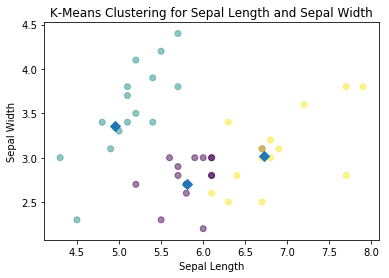

In [6]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = X_test.iloc[:,0]
ys = X_test.iloc[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
print(f'These are the centroid coordinates: \n {centroids}')

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.title('K-Means Clustering for Sepal Length and Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Talking Points
First off, notice that we reduced a 4D problem to a 2D problem for visualization. Thus, our picture has less information that it could if we were visualizing in 4D. Notice the usage of the cluster_centers method on model. It allows us to pull out the centroids of each cluster. Note that I only grabbed the first and second column of the centriods in order to put it on a 2D map. A centroid is essentially a center of mass of all the points which has been assigned to that cluster. It then calculates the Euclidean distance (or another distance metric if you so choose) between the centroid and all the points in its cluster, then averages the points in order to move the centroid, and keeps iterating until convergence.
* Watch the video starting from time 4:23 to see the geometric representation of what K-Means does. https://www.youtube.com/watch?v=_aWzGGNrcic

### Model Evaluation
How would we know that 3 is a good number of clusters if we didn't already know we were only dealing with 3 types of flowers? We would measure the inertia of each K-Means clustering and pick the "elbow" of the inertia graph after running a for loop through different values of clusters.

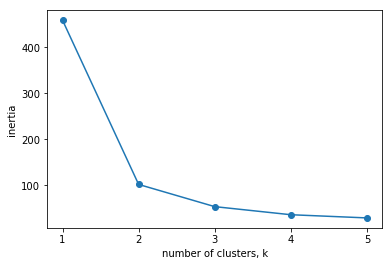

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Talking Points
Notice that as we add more clusters the inertia always goes down. This does not mean that the more clusters the better. It is best, as mentioned above, to pick the elbow of the graph where it seems that the decrease in inertia becomes less steep. Here we can see a big drop from 1 to 2, and another solid drop from 2 to 3. From 3 to 4 there isn't much of a drop, thus 3 clusters is best.

## How to Cluster with variables of significantly different variances
* To motivate this, think about a data set where the values aren't close in numerical values. My common thought is the difference from the S&P500 values and the VIX. Commonly, the S&P500 is between 2500-2900 (as of 2018) and the VIX is usually between 10-20. How do we tell our algorithms (notice I'm not just talking about unsupervised models) to treat each feature with equal weight? We often scale the data prior to fitting a model & pipeline that step with the algorithm itself.

In [8]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(X_train)

# Calculate the cluster labels: labels
pipeline_labels = pipeline.predict(X_test)
print(labels)

[1 1 0 0 1 2 1 2 2 2 1 0 1 0 2 0 0 2 2 2 2 0 0 1 0 1 1 0 1 1 0 0 2 0 2 1 2
 0 1 2 1 1 0 0 2]


In [9]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'predicted_labels': pipeline_labels, 'true_labels': y_test})

# Create crosstab: ct
ct = pd.crosstab(df['predicted_labels'],df['true_labels'])

# Display ct
ct

true_labels,0,1,2
predicted_labels,,,
0,14,0,0
1,0,2,14
2,1,9,5


### Talking points
Notice that label 0 here was predicted with much better accuracy than above. This isn't the best example because some of the other classes got mixed up due to the random nature of the train_test_split function and I didn't feel like going through a bunch of random states to prove my point. Ultimately, almost all algorithms benefit from scaling the data prior, especially when the variables of interest vary widely in terms of numbers.

## t-SNE
Motivation: Wouldn't it be great if we could visually represent our data even though we might have 20 or 30 input variables? Now you can. t-SNE (t-distributed stochastic neighbor embeddings), solves this issue. It allows you to take a very high dimension data set and reduce it to a 2D graph. t-SNE works to preserve the relative distances between the points coming from the 20 or 30 input columns down to 2-dimensions. With that, the x and y values have NO INTERPRETABLE meaning. The graph only preserves relative distance.

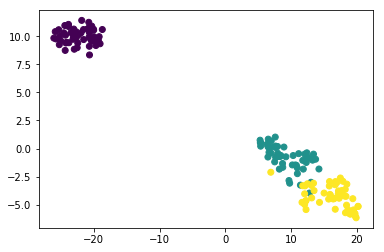

In [18]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(iris.data)
#print(tsne_features)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = iris.target)
plt.show()

### Talking Points
Notice a few things.
1. I used the original iris.data and iris.target straight out of the box.
2. There is no meaning of the x and y values. It is just the t-SNE values. These are the values that were compressed from a 4D data set to a 2D visualization. 

Also note that each time I run this the graph is different. This is the stochastic nature of t-SNE. It still preserves the relative distances but each re-run gives a different graph.